  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: FashionMNIST
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([10, 64, 2, 2])
Epoch [1/100], Loss: 0.0087, val_loss: 0.0050, val_acc: 0.7375
Epoch [2/100], Loss: 0.0044, val_loss: 0.0039, val_acc: 0.8223
Epoch [3/100], Loss: 0.0036, val_loss: 0.0034, val_acc: 0.8479
Epoch [4/100], Loss: 0.0031, val_loss: 0.0031, val_acc: 0.8609
Epoch [5/100], Loss: 0.0029, val_loss: 0.0030, val_acc: 0.8601
Epoch [6/100], Loss: 0.0027, val_loss: 0.0026, val_acc: 0.8823
Epoch [7/100], Loss: 0.0025, val_loss: 0.0028, val_acc: 0.8769
Epoch [8/100], Loss: 0.0024, val_loss: 0.0027, val_acc: 0.8784
Epoch [9/100], Loss: 0.0023, val_loss: 0.0025, val_acc: 0.8906
Epoch [10/100]

<function matplotlib.pyplot.show(close=None, block=None)>

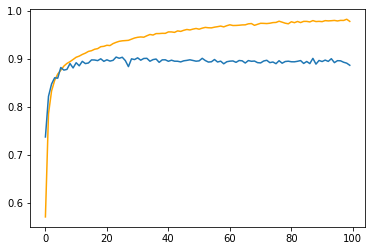

In [4]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
 
from torchvision.datasets import FashionMNIST
from torchvision import transforms
 
import matplotlib.pyplot as plt
%matplotlib inline
 
#データセット
fashion_mnist_train = FashionMNIST("FashionMNIST", train=True, download=True, transform=transforms.ToTensor())
 
fashion_mnist_test = FashionMNIST("FashionMNIST", train=False, download=True, transform=transforms.ToTensor())
 
batch_size = 128
train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=True)
 
print(fashion_mnist_train)
print(fashion_mnist_test)
 
#ネットワークの定義
#ネットワークの定義
class net(nn.Module):
    def __init__(self):
        super(net,self).__init__()
        #畳み込み層
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, stride=1, padding=0),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        #全結合層
        self.dence = nn.Sequential(
            nn.Linear( 64* 2 *2, 128),
            nn.Dropout(p=0.2),
            nn.Linear(128, 128),
            nn.Linear(128, 64),
            nn.Dropout(p=0.2),
            nn.Linear(64, 10),
        )
         
    #順伝播
    def forward(self,x):
         
        out = self.conv_layers(x)
        #Flatten
        out = out.view(out.size(0), -1)
        #全結合層
        out = self.dence(out)
         
        return out
     
    #畳み込み層の出力サイズのチェック
    def check_cnn_size(self, size_check):
        out = self.conv_layers(size_check)
         
        return out
 
#デバイスの選択
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = net().to(device)
 
#全結合層の入力サイズの確認
size_check = torch.FloatTensor(10, 1, 28, 28)
size_check = size_check.to(device)
print(net.check_cnn_size(size_check).size())
 
#損失関数
criterion = nn.CrossEntropyLoss()
 
#最適化
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
 
num_epochs = 100
 
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []
import time
start = time.time()
for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
     
    #train
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net.forward(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1] == labels).sum().item()
        loss.backward()
        optimizer.step()
     
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)
     
    #val
    net.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = net.forward(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1] == labels).sum().item()
    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)
     
    print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)
 
end = time.time() - start
print(end)
 
plt.plot(train_acc_list, color='orange')
plt.plot(val_acc_list)
plt.legend
plt.savefig('acc.png')
plt.show

In [5]:
print(optimizer.param_groups)

[{'params': [Parameter containing:
tensor([[[[-4.6735e-01, -3.5147e-01, -2.8914e-01, -3.7556e-01, -1.9990e-01],
          [-4.9516e-01, -5.0100e-01, -8.1450e-02,  3.1350e-01, -9.3528e-02],
          [-4.3701e-01, -3.3260e-02,  4.1774e-01,  3.1711e-01, -2.0378e-01],
          [-4.4752e-01,  1.2744e-01,  2.8283e-01,  2.9869e-01,  2.3338e-02],
          [-4.8094e-01,  2.5312e-01,  9.1909e-02,  1.0465e-01, -8.0781e-02]]],


        [[[ 3.2612e-01,  2.2279e-01,  1.2426e-01, -3.8091e-01, -4.2827e-01],
          [-1.7847e-01, -2.8856e-01,  9.1016e-02,  1.6388e-01,  1.4366e-01],
          [-4.6088e-01, -5.7832e-01, -2.5515e-01, -8.3496e-02,  2.4418e-02],
          [-7.2682e-01, -7.1777e-01, -2.7643e-01,  4.0477e-02,  1.1434e-01],
          [-5.6420e-01, -6.4509e-01, -6.0318e-02,  3.3834e-01, -2.0534e-01]]],


        [[[-8.1136e-02,  5.9169e-01,  1.7386e-01,  2.4467e-01,  1.8972e-02],
          [ 7.8344e-02, -2.3134e-01, -3.9306e-01, -6.6874e-01, -7.1173e-01],
          [ 1.2015e-01, -7.9648e-